<div style="text-align:center; color:green; font-size:40px;">Project Pahse 2</div>

At first we should install **Pulp** package & importing related libraries those we want to use them.

In [1]:
pip install pulp

     ---------------------------------------- 0.0/14.3 MB ? eta -:--:--
     ---------------------------------------- 0.0/14.3 MB ? eta -:--:--
     ---------------------------------------- 0.0/14.3 MB ? eta -:--:--
     ---------------------------------------- 0.0/14.3 MB ? eta -:--:--
     ---------------------------------------- 0.0/14.3 MB ? eta -:--:--
     ---------------------------------------- 0.0/14.3 MB ? eta -:--:--
     ---------------------------------------- 0.0/14.3 MB ? eta -:--:--
     ---------------------------------------- 0.0/14.3 MB ? eta -:--:--
     ---------------------------------------- 0.0/14.3 MB ? eta -:--:--
     ---------------------------------------- 0.0/14.3 MB ? eta -:--:--
     ---------------------------------------- 0.0/14.3 MB ? eta -:--:--
     ---------------------------------------- 0.0/14.3 MB ? eta -:--:--
     ---------------------------------------- 0.0/14.3 MB ? eta -:--:--
     ---------------------------------------- 0.0/14.3 MB ? eta 

In [1]:
import pulp
import matplotlib.pyplot as plt
from itertools import combinations

<div style="text-align:center; color:green; font-size:30px;">Part 1</div>

In this part we should solve our problem by using **Pulp** library, as you see we define our **varibles**, **objective function** & **constraints**.

In [28]:
# Define the indices for the variables
indexes_i = [1,2]
indexes_j = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

# Create a LP problem
problem1 = pulp.LpProblem("problem1", pulp.LpMaximize)

# Define decision variables for number of Team pass
X = pulp.LpVariable.dicts("X", ((j, i) for j in indexes_j for i in indexes_i), lowBound=0, cat=pulp.LpInteger)

# Define 'c' as a binary LpVariable (0 or 1)
C = pulp.LpVariable.dicts("C", indexes_j, lowBound=0, upBound=1, cat=pulp.LpBinary)

# Define variables a, p and n for the URS varible
A = pulp.LpVariable.dicts("A", indexes_j, cat=pulp.LpInteger)
P = pulp.LpVariable.dicts("P", indexes_j, lowBound=0, cat=pulp.LpInteger)  # p represents the positive part of a
N = pulp.LpVariable.dicts("N", indexes_j, lowBound=0, cat=pulp.LpInteger)  # n represents the negative part of a
M = 1000000
# Objective function
problem1 += ((40 * X[1,1]) + (20 * X[1,2]) + (20 * X[2,1]) + (40 * X[2,2]) + (60 * X[3,1]) + (50 * X[3,2]) + (80 * X[4,1]) + (20 * X[4,2]) + (50 * X[5,1]) + (30 * X[5,2]) + (40 * X[6,1]) + (30 * X[6,2]) + (70 * X[7,1]) + (20 * X[7,2]) + (60 * X[8,1]) + (20 * X[8,2])
            + pulp.lpSum(10 * P[j] for j in [1,2,3,4,5,6,7,8]) + pulp.lpSum(20 * P[j] for j in [9,10,11,12])  + pulp.lpSum(30 * P[j] for j in [13,14]) + pulp.lpSum(40 * P[j] for j in [15]) 
            - pulp.lpSum(20 * N[j] for j in [1,2,3,4,5,6,7,8]) - pulp.lpSum(40 * N[j] for j in [9,10,11,12]) - pulp.lpSum(60 * N[j] for j in [13,14]) - pulp.lpSum(80 * N[j] for j in [15])
            )

# Constraint Spectators 
for j in [1,2,3,4,5,6,7,8]:
    for i in indexes_i:
        problem1 += X[j,i] <= 10000

# Constraint of Spectators
problem1 += pulp.lpSum(C[j] for j in indexes_j) == 3

# Constraint of URS variable
for j in indexes_j:
    problem1 += A[j] == P[j] - N[j]

for j in indexes_j:
    problem1 += A[j] == 10000 - X[j,1] - X[j,2]

# Constraint of next match's spectators platform 1, game 9
problem1 += (1/2) * (X[1,1] + X[1,2]) - X[9,1] + M * C[1] >= 0
problem1 += (1/2) * (X[1,1] + X[1,2]) - X[9,1] <= M * C[1]
problem1 += X[9,1] - X[1,1] + M * (1 - C[1]) >= 0
problem1 += X[9,1] - X[1,1] <= M * (1 - C[1])

# Constraint of next match's spectators platform 2, game 9
problem1 += (1/2) * (X[2,1] + X[2,2]) - X[9,2] + M * C[2] >= 0
problem1 += (1/2) * (X[2,1] + X[2,2]) - X[9,2] <= M * C[2]
problem1 += X[9,2] - X[2,1] + M * (1 - C[2]) >= 0
problem1 += X[9,2] - X[2,1] <= M * (1 - C[2])

# Constraint of next match's spectators platform 1, game 10
problem1 += (1/2) * (X[3,1] + X[3,2]) - X[10,1] + M * C[3] >= 0
problem1 += (1/2) * (X[3,1] + X[3,2]) - X[10,1] <= M * C[3]
problem1 += X[10,1] - X[3,1] + M * (1 - C[3]) >= 0
problem1 += X[10,1] - X[3,1] <= M * (1 - C[3])

# Constraint of next match's spectators platform 2, game 10
problem1 += (1/2) * (X[4,1] + X[4,2]) - X[10,2] + M * C[4] >= 0
problem1 += (1/2) * (X[4,1] + X[4,2]) - X[10,2] <= M * C[4]
problem1 += X[10,2] - X[4,1] + M * (1 - C[4]) >= 0
problem1 += X[10,2] - X[4,1] <= M * (1 - C[4])

# Constraint of next match's spectators platform 1, game 11
problem1 += (1/2) * (X[5,1] + X[5,2]) - X[11,1] + M * C[5] >= 0
problem1 += (1/2) * (X[5,1] + X[5,2]) - X[11,1] <= M * C[5]
problem1 += X[11,1] - X[5,1] + M * (1 - C[5]) >= 0
problem1 += X[11,1] - X[5,1] <= M * (1 - C[5])

# Constraint of next match's spectators platform 2, game 11
problem1 += (1/2) * (X[6,1] + X[6,2]) - X[11,2] + M * C[6] >= 0
problem1 += (1/2) * (X[6,1] + X[6,2]) - X[11,2] <= M * C[6]
problem1 += X[11,2] - X[6,1] + M * (1 - C[6]) >= 0
problem1 += X[11,2] - X[6,1] <= M * (1 - C[6])

# Constraint of next match's spectators platform 1, game 12
problem1 += (1/2) * (X[7,1] + X[7,2]) - X[12,1] + M * C[7] >= 0
problem1 += (1/2) * (X[7,1] + X[7,2]) - X[12,1] <= M * C[7]
problem1 += X[12,1] - X[7,1] + M * (1 - C[7]) >= 0
problem1 += X[12,1] - X[7,1] <= M * (1 - C[7])

# Constraint of next match's spectators platform 2, game 12
problem1 += (1/2) * (X[8,1] + X[8,2]) - X[12,2] + M * C[8] >= 0
problem1 += (1/2) * (X[8,1] + X[8,2]) - X[12,2] <= M * C[8]
problem1 += X[12,2] - X[8,1] + M * (1 - C[8]) >= 0
problem1 += X[12,2] - X[8,1] <= M * (1 - C[8])

# Constraint of next match's spectators platform 1, game 13
problem1 += (1/2) * (X[9,1] + X[9,2]) - X[13,1] + M * C[9] >= 0
problem1 += (1/2) * (X[9,1] + X[9,2]) - X[13,1] <= M * C[9]
problem1 += X[13,1] - X[9,1] + M * (1 - C[9]) >= 0
problem1 += X[13,1] - X[9,1] <= M * (1 - C[9])

# Constraint of next match's spectators platform 2, game 13
problem1 += (1/2) * (X[10,1] + X[10,2]) - X[13,2] + M * C[10] >= 0
problem1 += (1/2) * (X[10,1] + X[10,2]) - X[13,2] <= M * C[10]
problem1 += X[13,2] - X[10,1] + M * (1 - C[10]) >= 0
problem1 += X[13,2] - X[10,1] <= M * (1 - C[10])

# Constraint of next match's spectators platform 1, game 14
problem1 += (1/2) * (X[11,1] + X[11,2]) - X[14,1] + M * C[11] >= 0
problem1 += (1/2) * (X[11,1] + X[11,2]) - X[14,1] <= M * C[11]
problem1 += X[14,1] - X[11,1] + M * (1 - C[11]) >= 0
problem1 += X[14,1] - X[11,1] <= M * (1 - C[11])

# Constraint of next match's spectators platform 2, game 14
problem1 += (1/2) * (X[12,1] + X[12,2]) - X[14,2] + M * C[12] >= 0
problem1 += (1/2) * (X[12,1] + X[12,2]) - X[14,2] <= M * C[12]
problem1 += X[14,2] - X[12,1] + M * (1 - C[12]) >= 0
problem1 += X[14,2] - X[12,1] <= M * (1 - C[12])

# Constraint of next match's spectators platform 1, game 15
problem1 += (1/2) * (X[13,1] + X[13,2]) - X[15,1] + M * C[13] >= 0
problem1 += (1/2) * (X[13,1] + X[13,2]) - X[15,1] <= M * C[13]
problem1 += X[15,1] - X[13,1] + M * (1 - C[13]) >= 0
problem1 += X[15,1] - X[13,1] <= M * (1 - C[13])

# Constraint of next match's spectators platform 2, game 15
problem1 += (1/2) * (X[14,1] + X[14,2]) - X[15,2] + M * C[14] >= 0
problem1 += (1/2) * (X[14,1] + X[14,2]) - X[15,2] <= M * C[14]
problem1 += X[15,2] - X[14,1] + M * (1 - C[14]) >= 0
problem1 += X[15,2] - X[14,1] <= M * (1 - C[14])

# Solve the Problem1 problem
problem1.solve()

# Print the status of the solution
print("Status:", pulp.LpStatus[problem1.status])

# Print the optimal values of the decision variables
print("Optimal values:")
for i in indexes_i:
    for j in indexes_j:
        print(f"X[{j},{i}] = {X[j,i].varValue}")

for j in indexes_j:
    print(f"C[{j}] = {C[j].varValue}")

for j in indexes_j:
    print(f"P[{j}] = {P[j].varValue}")

for j in indexes_j:
    print(f"N[{j}] = {N[j].varValue}")

# Print the optimal value of the objective function
print("Optimal objective function value:", pulp.value(problem1.objective))

Status: Optimal
Optimal values:
X[1,1] = 10000.0
X[2,1] = 0.0
X[3,1] = 0.0
X[4,1] = 10000.0
X[5,1] = 10000.0
X[6,1] = 0.0
X[7,1] = 10000.0
X[8,1] = 10000.0
X[9,1] = 5000.0
X[10,1] = 0.0
X[11,1] = 5000.0
X[12,1] = 5000.0
X[13,1] = 2500.0
X[14,1] = 2500.0
X[15,1] = 2500.0
X[1,2] = 0.0
X[2,2] = 10000.0
X[3,2] = 10000.0
X[4,2] = 0.0
X[5,2] = 0.0
X[6,2] = 10000.0
X[7,2] = 0.0
X[8,2] = 0.0
X[9,2] = 0.0
X[10,2] = 5000.0
X[11,2] = 0.0
X[12,2] = 5000.0
X[13,2] = 2500.0
X[14,2] = 5000.0
X[15,2] = 3750.0
C[1] = 0.0
C[2] = 1.0
C[3] = 1.0
C[4] = 0.0
C[5] = 0.0
C[6] = 1.0
C[7] = 0.0
C[8] = 0.0
C[9] = 0.0
C[10] = 0.0
C[11] = 0.0
C[12] = 0.0
C[13] = 0.0
C[14] = 0.0
C[15] = 0.0
P[1] = 0.0
P[2] = 0.0
P[3] = 0.0
P[4] = 0.0
P[5] = 0.0
P[6] = 0.0
P[7] = 0.0
P[8] = 0.0
P[9] = 5000.0
P[10] = 5000.0
P[11] = 5000.0
P[12] = 0.0
P[13] = 5000.0
P[14] = 2500.0
P[15] = 3750.0
N[1] = 0.0
N[2] = 0.0
N[3] = 0.0
N[4] = 0.0
N[5] = 0.0
N[6] = 0.0
N[7] = 0.0
N[8] = 0.0
N[9] = 0.0
N[10] = 0.0
N[11] = 0.0
N[12] = 0.0
N[13] 

In [12]:
for name, constraint in problem1.constraints.items():
        print(name, ":", constraint)

_C1 : X_(1,_1) <= 10000
_C2 : X_(1,_2) <= 10000
_C3 : X_(2,_1) <= 10000
_C4 : X_(2,_2) <= 10000
_C5 : X_(3,_1) <= 10000
_C6 : X_(3,_2) <= 10000
_C7 : X_(4,_1) <= 10000
_C8 : X_(4,_2) <= 10000
_C9 : X_(5,_1) <= 10000
_C10 : X_(5,_2) <= 10000
_C11 : X_(6,_1) <= 10000
_C12 : X_(6,_2) <= 10000
_C13 : X_(7,_1) <= 10000
_C14 : X_(7,_2) <= 10000
_C15 : X_(8,_1) <= 10000
_C16 : X_(8,_2) <= 10000
_C17 : C_1 + C_10 + C_11 + C_12 + C_13 + C_14 + C_15 + C_2 + C_3 + C_4 + C_5 + C_6 + C_7 + C_8 + C_9 = 3
_C18 : A_1 + N_1 - P_1 = 0
_C19 : A_2 + N_2 - P_2 = 0
_C20 : A_3 + N_3 - P_3 = 0
_C21 : A_4 + N_4 - P_4 = 0
_C22 : A_5 + N_5 - P_5 = 0
_C23 : A_6 + N_6 - P_6 = 0
_C24 : A_7 + N_7 - P_7 = 0
_C25 : A_8 + N_8 - P_8 = 0
_C26 : A_9 + N_9 - P_9 = 0
_C27 : A_10 + N_10 - P_10 = 0
_C28 : A_11 + N_11 - P_11 = 0
_C29 : A_12 + N_12 - P_12 = 0
_C30 : A_13 + N_13 - P_13 = 0
_C31 : A_14 + N_14 - P_14 = 0
_C32 : A_15 + N_15 - P_15 = 0
_C33 : A_1 + X_(1,_1) + X_(1,_2) = 10000
_C34 : A_2 + X_(2,_1) + X_(2,_2) = 10000

In [13]:
print(problem1.objective)

-20*N_1 - 40*N_10 - 40*N_11 - 40*N_12 - 60*N_13 - 60*N_14 - 80*N_15 - 20*N_2 - 20*N_3 - 20*N_4 - 20*N_5 - 20*N_6 - 20*N_7 - 20*N_8 - 40*N_9 + 10*P_1 + 20*P_10 + 20*P_11 + 20*P_12 + 30*P_13 + 30*P_14 + 40*P_15 + 10*P_2 + 10*P_3 + 10*P_4 + 10*P_5 + 10*P_6 + 10*P_7 + 10*P_8 + 20*P_9 + 40*X_(1,_1) + 20*X_(1,_2) + 20*X_(2,_1) + 40*X_(2,_2) + 60*X_(3,_1) + 50*X_(3,_2) + 80*X_(4,_1) + 20*X_(4,_2) + 50*X_(5,_1) + 30*X_(5,_2) + 40*X_(6,_1) + 30*X_(6,_2) + 70*X_(7,_1) + 20*X_(7,_2) + 60*X_(8,_1) + 20*X_(8,_2)


<div style="text-align:center; color:green; font-size:30px;">Part 2</div>

In This part we should **plotting** our **sensitivity analysis** on coefficient of variable in objective function & RHS.

[{'param_x_21_coeff': 10, 'objective_value': 4875000.0}, {'param_x_21_coeff': 15, 'objective_value': 4875000.0}, {'param_x_21_coeff': 20, 'objective_value': 4875000.0}, {'param_x_21_coeff': 25, 'objective_value': 4875000.0}, {'param_x_21_coeff': 30, 'objective_value': 4875000.0}, {'param_x_21_coeff': 35, 'objective_value': 4875000.0}, {'param_x_21_coeff': 40, 'objective_value': 4875000.0}, {'param_x_21_coeff': 45, 'objective_value': 4875000.0}, {'param_x_21_coeff': 50, 'objective_value': 4900000.0}, {'param_x_21_coeff': 55, 'objective_value': 4950000.0}, {'param_x_21_coeff': 60, 'objective_value': 5000000.0}, {'param_x_21_coeff': 65, 'objective_value': 5050000.0}, {'param_x_21_coeff': 70, 'objective_value': 5100000.0}, {'param_x_21_coeff': 75, 'objective_value': 5150000.0}, {'param_x_21_coeff': 80, 'objective_value': 5200000.0}, {'param_x_21_coeff': 85, 'objective_value': 5250000.0}, {'param_x_21_coeff': 90, 'objective_value': 5300000.0}]


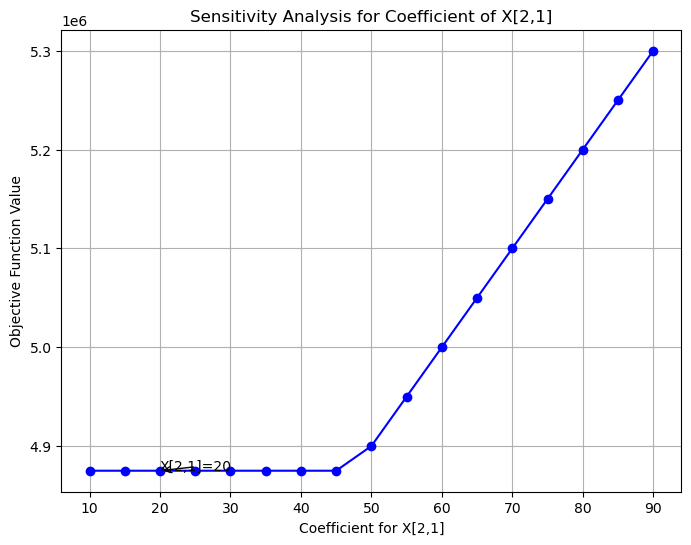

In [10]:
# Function to setup LP problem with varying coefficients for X[2,1] in the objective function
def setup_lp_problem_x_21(adad, param_x_21_coeff):

    problem1.objective += param_x_21_coeff * X[2,1] -  adad * X[2,1]
    # Change the coefficient associated with X[2,1] in the objective function
    
    
    return problem1

# Define coefficient values for sensitivity analysis for X[2,1]
param_values_x_21_coeff = list(range(10,91,5))  # List of coefficient values for X[2,1]

# Store optimal solutions for different coefficient combinations for X[2,1]
optimal_solutions_x_21 = []

for index, x_21_coeff in enumerate(param_values_x_21_coeff):
    if index == 0:
        problem1 = setup_lp_problem_x_21(20, x_21_coeff)
        problem1.solve()
    else:
        problem1 = setup_lp_problem_x_21(param_values_x_21_coeff[index-1], x_21_coeff)
        problem1.solve()
    if problem1.status == pulp.LpStatusOptimal:
        optimal_solutions_x_21.append({
            'param_x_21_coeff': x_21_coeff,
            'objective_value': pulp.value(problem1.objective),
        })

# Print the optimal solutions list
print(optimal_solutions_x_21)

# Plot for X[2,1] coefficient
if optimal_solutions_x_21:
    plt.figure(figsize=(8, 6))
    plt.plot([sol['param_x_21_coeff'] for sol in optimal_solutions_x_21],
             [sol['objective_value'] for sol in optimal_solutions_x_21],
             marker='o', linestyle='-', color='b')
    
    plt.xlabel('Coefficient for X[2,1]')
    plt.ylabel('Objective Function Value')
    plt.title('Sensitivity Analysis for Coefficient of X[2,1]')
    plt.grid(True)
    
    # Annotate the point where X[2,1] = 20 if it exists in the solutions
    if any(sol['param_x_21_coeff'] == 20 for sol in optimal_solutions_x_21):
        plt.annotate('X[2,1]=20', xy=(20, next(sol['objective_value'] for sol in optimal_solutions_x_21 if sol['param_x_21_coeff'] == 20)),
                     xytext=(20, next(sol['objective_value'] for sol in optimal_solutions_x_21 if sol['param_x_21_coeff'] == 20) + 50),
                     arrowprops=dict(facecolor='black', arrowstyle='->'))
    
    plt.show()
else:
    print("No feasible solutions found for X[2,1] coefficient.")


[{'param_x_52_coeff': 10, 'objective_value': 4875000.0}, {'param_x_52_coeff': 15, 'objective_value': 4875000.0}, {'param_x_52_coeff': 20, 'objective_value': 4875000.0}, {'param_x_52_coeff': 25, 'objective_value': 4875000.0}, {'param_x_52_coeff': 30, 'objective_value': 4875000.0}, {'param_x_52_coeff': 35, 'objective_value': 4875000.0}, {'param_x_52_coeff': 40, 'objective_value': 4875000.0}, {'param_x_52_coeff': 45, 'objective_value': 4925000.0}, {'param_x_52_coeff': 50, 'objective_value': 4975000.0}, {'param_x_52_coeff': 55, 'objective_value': 5025000.0}, {'param_x_52_coeff': 60, 'objective_value': 5075000.0}, {'param_x_52_coeff': 65, 'objective_value': 5125000.0}, {'param_x_52_coeff': 70, 'objective_value': 5175000.0}, {'param_x_52_coeff': 75, 'objective_value': 5225000.0}, {'param_x_52_coeff': 80, 'objective_value': 5275000.0}, {'param_x_52_coeff': 85, 'objective_value': 5325000.0}, {'param_x_52_coeff': 90, 'objective_value': 5375000.0}]


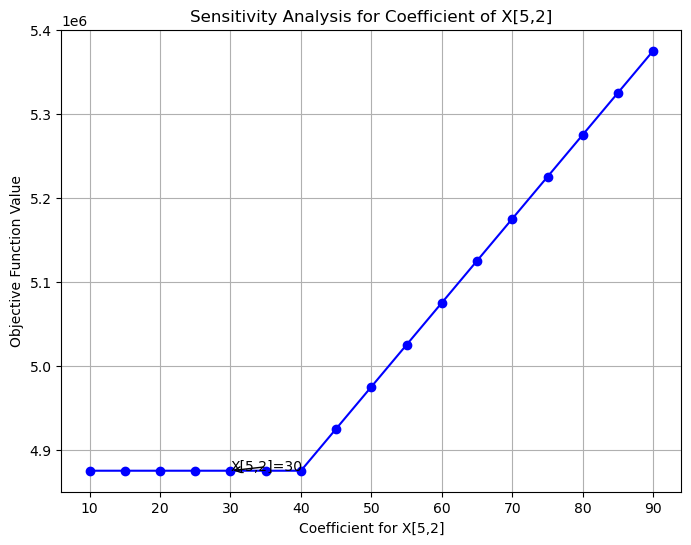

In [12]:
# Function to setup LP problem with varying coefficients for X[5,2] in the objective function
def setup_lp_problem_x_52(adad, param_x_52_coeff):

    problem1.objective += param_x_52_coeff * X[5,2] -  adad * X[5,2]
    # Change the coefficient associated with X[5,2] in the objective function
    
    
    return problem1

# Define coefficient values for sensitivity analysis for X[5,2]
param_values_x_52_coeff = list(range(10,91,5))  # List of coefficient values for X[5,2]

# Store optimal solutions for different coefficient combinations for X[5,2]
optimal_solutions_x_52 = []

for index, x_52_coeff in enumerate(param_values_x_52_coeff):
    if index == 0:
        problem1 = setup_lp_problem_x_52(30, x_52_coeff)
        problem1.solve()
    else:
        problem1 = setup_lp_problem_x_52(param_values_x_52_coeff[index-1], x_52_coeff)
        problem1.solve()
    if problem1.status == pulp.LpStatusOptimal:
        optimal_solutions_x_52.append({
            'param_x_52_coeff': x_52_coeff,
            'objective_value': pulp.value(problem1.objective),
        })

# Print the optimal solutions list
print(optimal_solutions_x_52)

# Plot for X[5,2] coefficient
if optimal_solutions_x_52:
    plt.figure(figsize=(8, 6))
    plt.plot([sol['param_x_52_coeff'] for sol in optimal_solutions_x_52],
             [sol['objective_value'] for sol in optimal_solutions_x_52],
             marker='o', linestyle='-', color='b')
    
    plt.xlabel('Coefficient for X[5,2]')
    plt.ylabel('Objective Function Value')
    plt.title('Sensitivity Analysis for Coefficient of X[5,2]')
    plt.grid(True)
    
    # Annotate the point where X[5,2] = 30 if it exists in the solutions
    if any(sol['param_x_52_coeff'] == 30 for sol in optimal_solutions_x_52):
        plt.annotate('X[5,2]=30', xy=(30, next(sol['objective_value'] for sol in optimal_solutions_x_52 if sol['param_x_52_coeff'] == 30)),
                     xytext=(30, next(sol['objective_value'] for sol in optimal_solutions_x_52 if sol['param_x_52_coeff'] == 30) + 50),
                     arrowprops=dict(facecolor='black', arrowstyle='->'))
    
    plt.show()
else:
    print("No feasible solutions found for X[5,2] coefficient.")


[{'param_RHS_X82': 5000, 'objective_value': 4875000.0}, {'param_RHS_X82': 10000, 'objective_value': 4875000.0}, {'param_RHS_X82': 15000, 'objective_value': 4875000.0}, {'param_RHS_X82': 20000, 'objective_value': 4875000.0}, {'param_RHS_X82': 25000, 'objective_value': 4875000.0}, {'param_RHS_X82': 30000, 'objective_value': 4875000.0}, {'param_RHS_X82': 35000, 'objective_value': 4875000.0}, {'param_RHS_X82': 40000, 'objective_value': 4875000.0}, {'param_RHS_X82': 45000, 'objective_value': 4875000.0}, {'param_RHS_X82': 50000, 'objective_value': 4875000.0}, {'param_RHS_X82': 55000, 'objective_value': 4875000.0}, {'param_RHS_X82': 60000, 'objective_value': 4875000.0}, {'param_RHS_X82': 65000, 'objective_value': 4875000.0}, {'param_RHS_X82': 70000, 'objective_value': 4875000.0}, {'param_RHS_X82': 75000, 'objective_value': 4875000.0}, {'param_RHS_X82': 80000, 'objective_value': 4875000.0}, {'param_RHS_X82': 85000, 'objective_value': 4875000.0}]


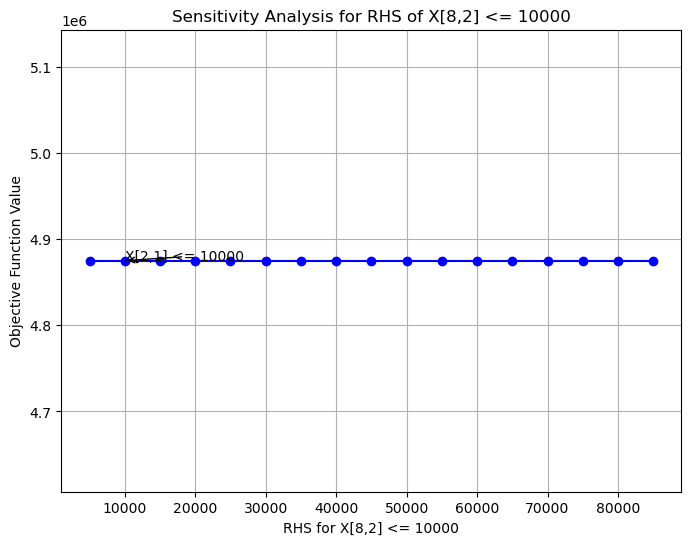

In [14]:
# Function to setup LP problem with varying RHS for X[8,2] in the constraints
def setup_lp_problem_X82(problem, param_RHS_X82):
    # Find the constraint associated with X[8,2]
    con_to_remove = None
    for con in problem.constraints:
        if str(X[8,2]) in str(problem.constraints[con]):
            con_to_remove = con
            break
    
    if con_to_remove:
        # Change the RHS 
        problem.constraints.pop(con_to_remove)
        problem += X[8,2] <= param_RHS_X82 
    else:
        print("Constraint associated with X[8,2] not found.")

    return problem


# Define RHS values for sensitivity analysis for X[8,2]
RHS_X82 = list(range(5000, 90000, 5000))  # List of RHS values for X[8,2]

# Store optimal solutions for different RHS combinations for X[8,2]
optimal_solutions_X82 = []


for index, X82_RHS in enumerate(RHS_X82):
    problem1_copy = problem1.copy()  # Create a copy of the problem
    problem1_copy = setup_lp_problem_X82(problem1_copy, X82_RHS)
    problem1_copy.solve()
    if problem1_copy.status == pulp.LpStatusOptimal:
        optimal_solutions_X82.append({
            'param_RHS_X82': X82_RHS,
            'objective_value': pulp.value(problem1_copy.objective),
        })

# Print the optimal solutions list
print(optimal_solutions_X82)

# Plot for X[8,2] RHS
if optimal_solutions_X82:
    plt.figure(figsize=(8, 6))
    plt.plot([sol['param_RHS_X82'] for sol in optimal_solutions_X82],
             [sol['objective_value'] for sol in optimal_solutions_X82],
             marker='o', linestyle='-', color='b')
    
    plt.xlabel('RHS for X[8,2] <= 10000')
    plt.ylabel('Objective Function Value')
    plt.title('Sensitivity Analysis for RHS of X[8,2] <= 10000')
    plt.grid(True)
    
    # Annotate the point where X[8,2] <= 10000 if it exists in the solutions
    if any(sol['param_RHS_X82'] == 10000 for sol in optimal_solutions_X82):
        plt.annotate('X[2,1] <= 10000', xy=(10000, next(sol['objective_value'] for sol in optimal_solutions_X82 if sol['param_RHS_X82'] == 10000)),
                     xytext=(10000, next(sol['objective_value'] for sol in optimal_solutions_X82 if sol['param_RHS_X82'] == 10000) + 50),
                     arrowprops=dict(facecolor='black', arrowstyle='->'))
    
    plt.show()
else:
    print("No feasible solutions found for X[8,2] <= 10000 RHS.")


[{'param_RHS_X41': 5000, 'objective_value': 4637500.0}, {'param_RHS_X41': 10000, 'objective_value': 4875000.0}, {'param_RHS_X41': 15000, 'objective_value': 5125000.0}, {'param_RHS_X41': 20000, 'objective_value': 5375000.0}, {'param_RHS_X41': 25000, 'objective_value': 5575000.0}, {'param_RHS_X41': 30000, 'objective_value': 5775000.0}, {'param_RHS_X41': 35000, 'objective_value': 5975000.0}, {'param_RHS_X41': 40000, 'objective_value': 6175000.0}, {'param_RHS_X41': 45000, 'objective_value': 6375000.0}, {'param_RHS_X41': 50000, 'objective_value': 6575000.0}, {'param_RHS_X41': 55000, 'objective_value': 6775000.0}, {'param_RHS_X41': 60000, 'objective_value': 6975000.0}, {'param_RHS_X41': 65000, 'objective_value': 7175000.0}, {'param_RHS_X41': 70000, 'objective_value': 7375000.0}, {'param_RHS_X41': 75000, 'objective_value': 7575000.0}, {'param_RHS_X41': 80000, 'objective_value': 7775000.0}, {'param_RHS_X41': 85000, 'objective_value': 7975000.0}]


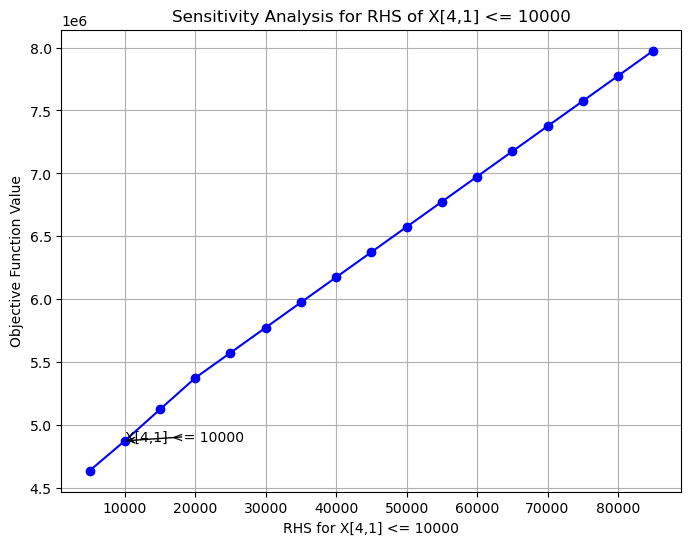

In [9]:
# Function to setup LP problem with varying RHS for X[4,1] in the constraints
def setup_lp_problem_X41(problem, param_RHS_X41):
    # Find the constraint associated with X[4,1]
    con_to_remove = None
    for con in problem.constraints:
        if str(X[4,1]) in str(problem.constraints[con]):
            con_to_remove = con
            break
    
    if con_to_remove:
        # Change the RHS 
        problem.constraints.pop(con_to_remove)
        problem += X[4,1] <= param_RHS_X41 
    else:
        print("Constraint associated with X[4,1] not found.")

    return problem


# Define RHS values for sensitivity analysis for X[4,1]
RHS_X41 = list(range(5000, 90000, 5000))  # List of RHS values for X[4,1]

# Store optimal solutions for different RHS combinations for X[4,1]
optimal_solutions_X41 = []


for index, X41_RHS in enumerate(RHS_X41):
    problem1_copy = problem1.copy()  # Create a copy of the problem
    problem1_copy = setup_lp_problem_X41(problem1_copy, X41_RHS)
    problem1_copy.solve()
    if problem1_copy.status == pulp.LpStatusOptimal:
        optimal_solutions_X41.append({
            'param_RHS_X41': X41_RHS,
            'objective_value': pulp.value(problem1_copy.objective),
        })

# Print the optimal solutions list
print(optimal_solutions_X41)

# Plot for X[4,1] RHS
if optimal_solutions_X41:
    plt.figure(figsize=(8, 6))
    plt.plot([sol['param_RHS_X41'] for sol in optimal_solutions_X41],
             [sol['objective_value'] for sol in optimal_solutions_X41],
             marker='o', linestyle='-', color='b')
    
    plt.xlabel('RHS for X[4,1] <= 10000')
    plt.ylabel('Objective Function Value')
    plt.title('Sensitivity Analysis for RHS of X[4,1] <= 10000')
    plt.grid(True)
    
    # Annotate the point where X[4,1] <= 10000 if it exists in the solutions
    if any(sol['param_RHS_X41'] == 10000 for sol in optimal_solutions_X41):
        plt.annotate('X[4,1] <= 10000', xy=(10000, next(sol['objective_value'] for sol in optimal_solutions_X41 if sol['param_RHS_X41'] == 10000)),
                     xytext=(10000, next(sol['objective_value'] for sol in optimal_solutions_X41 if sol['param_RHS_X41'] == 10000) + 50),
                     arrowprops=dict(facecolor='black', arrowstyle='->'))
    
    plt.show()
else:
    print("No feasible solutions found for X[4,1] <= 10000 RHS.")


<div style="text-align:center; color:green; font-size:30px;">Part 3</div>

This part is about sesitivity analysis in ranges. **Pulp** hasn't any library to give report for **ranges** so because of that we should install new solver that called **GLPK**. You must note that GLPK doesn't solve **MIP** problem & because of that you should relaxed your problem.

In [5]:
# Define the indices for the variables
indexes_i = [1,2]
indexes_j = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

# Create a LP problem
problem1 = pulp.LpProblem("problem1", pulp.LpMaximize)

# Define decision variables for number of Team pass
X = pulp.LpVariable.dicts("X", ((j, i) for j in indexes_j for i in indexes_i), lowBound=0)

# Define 'c' as a binary LpVariable (0 or 1)
C = pulp.LpVariable.dicts("C", indexes_j, lowBound=0, upBound=1)

# Define variables a, p and n for the URS varible
A = pulp.LpVariable.dicts("A", indexes_j)
P = pulp.LpVariable.dicts("P", indexes_j, lowBound=0)  # p represents the positive part of a
N = pulp.LpVariable.dicts("N", indexes_j, lowBound=0)  # n represents the negative part of a
M = 1000000
# Objective function
problem1 += ((40 * X[1,1]) + (20 * X[1,2]) + (20 * X[2,1]) + (40 * X[2,2]) + (60 * X[3,1]) + (50 * X[3,2]) + (80 * X[4,1]) + (20 * X[4,2]) + (50 * X[5,1]) + (30 * X[5,2]) + (40 * X[6,1]) + (30 * X[6,2]) + (70 * X[7,1]) + (20 * X[7,2]) + (60 * X[8,1]) + (20 * X[8,2])
            + pulp.lpSum(10 * P[j] for j in [1,2,3,4,5,6,7,8]) + pulp.lpSum(20 * P[j] for j in [9,10,11,12])  + pulp.lpSum(30 * P[j] for j in [13,14]) + pulp.lpSum(40 * P[j] for j in [15]) 
            - pulp.lpSum(20 * N[j] for j in [1,2,3,4,5,6,7,8]) - pulp.lpSum(40 * N[j] for j in [9,10,11,12]) - pulp.lpSum(60 * N[j] for j in [13,14]) - pulp.lpSum(80 * N[j] for j in [15])
            )

# Constraint Spectators 
for j in [1,2,3,4,5,6,7,8]:
    for i in indexes_i:
        problem1 += X[j,i] <= 10000

# Constraint of Spectators
problem1 += pulp.lpSum(C[j] for j in indexes_j) == 3

# Constraint of URS variable
for j in indexes_j:
    problem1 += A[j] == P[j] - N[j]

for j in indexes_j:
    problem1 += A[j] == 10000 - X[j,1] - X[j,2]

# Constraint of next match's spectators platform 1, game 9
problem1 += (1/2) * (X[1,1] + X[1,2]) - X[9,1] + M * C[1] >= 0
problem1 += (1/2) * (X[1,1] + X[1,2]) - X[9,1] <= M * C[1]
problem1 += X[9,1] - X[1,1] + M * (1 - C[1]) >= 0
problem1 += X[9,1] - X[1,1] <= M * (1 - C[1])

# Constraint of next match's spectators platform 2, game 9
problem1 += (1/2) * (X[2,1] + X[2,2]) - X[9,2] + M * C[2] >= 0
problem1 += (1/2) * (X[2,1] + X[2,2]) - X[9,2] <= M * C[2]
problem1 += X[9,2] - X[2,1] + M * (1 - C[2]) >= 0
problem1 += X[9,2] - X[2,1] <= M * (1 - C[2])

# Constraint of next match's spectators platform 1, game 10
problem1 += (1/2) * (X[3,1] + X[3,2]) - X[10,1] + M * C[3] >= 0
problem1 += (1/2) * (X[3,1] + X[3,2]) - X[10,1] <= M * C[3]
problem1 += X[10,1] - X[3,1] + M * (1 - C[3]) >= 0
problem1 += X[10,1] - X[3,1] <= M * (1 - C[3])

# Constraint of next match's spectators platform 2, game 10
problem1 += (1/2) * (X[4,1] + X[4,2]) - X[10,2] + M * C[4] >= 0
problem1 += (1/2) * (X[4,1] + X[4,2]) - X[10,2] <= M * C[4]
problem1 += X[10,2] - X[4,1] + M * (1 - C[4]) >= 0
problem1 += X[10,2] - X[4,1] <= M * (1 - C[4])

# Constraint of next match's spectators platform 1, game 11
problem1 += (1/2) * (X[5,1] + X[5,2]) - X[11,1] + M * C[5] >= 0
problem1 += (1/2) * (X[5,1] + X[5,2]) - X[11,1] <= M * C[5]
problem1 += X[11,1] - X[5,1] + M * (1 - C[5]) >= 0
problem1 += X[11,1] - X[5,1] <= M * (1 - C[5])

# Constraint of next match's spectators platform 2, game 11
problem1 += (1/2) * (X[6,1] + X[6,2]) - X[11,2] + M * C[6] >= 0
problem1 += (1/2) * (X[6,1] + X[6,2]) - X[11,2] <= M * C[6]
problem1 += X[11,2] - X[6,1] + M * (1 - C[6]) >= 0
problem1 += X[11,2] - X[6,1] <= M * (1 - C[6])

# Constraint of next match's spectators platform 1, game 12
problem1 += (1/2) * (X[7,1] + X[7,2]) - X[12,1] + M * C[7] >= 0
problem1 += (1/2) * (X[7,1] + X[7,2]) - X[12,1] <= M * C[7]
problem1 += X[12,1] - X[7,1] + M * (1 - C[7]) >= 0
problem1 += X[12,1] - X[7,1] <= M * (1 - C[7])

# Constraint of next match's spectators platform 2, game 12
problem1 += (1/2) * (X[8,1] + X[8,2]) - X[12,2] + M * C[8] >= 0
problem1 += (1/2) * (X[8,1] + X[8,2]) - X[12,2] <= M * C[8]
problem1 += X[12,2] - X[8,1] + M * (1 - C[8]) >= 0
problem1 += X[12,2] - X[8,1] <= M * (1 - C[8])

# Constraint of next match's spectators platform 1, game 13
problem1 += (1/2) * (X[9,1] + X[9,2]) - X[13,1] + M * C[9] >= 0
problem1 += (1/2) * (X[9,1] + X[9,2]) - X[13,1] <= M * C[9]
problem1 += X[13,1] - X[9,1] + M * (1 - C[9]) >= 0
problem1 += X[13,1] - X[9,1] <= M * (1 - C[9])

# Constraint of next match's spectators platform 2, game 13
problem1 += (1/2) * (X[10,1] + X[10,2]) - X[13,2] + M * C[10] >= 0
problem1 += (1/2) * (X[10,1] + X[10,2]) - X[13,2] <= M * C[10]
problem1 += X[13,2] - X[10,1] + M * (1 - C[10]) >= 0
problem1 += X[13,2] - X[10,1] <= M * (1 - C[10])

# Constraint of next match's spectators platform 1, game 14
problem1 += (1/2) * (X[11,1] + X[11,2]) - X[14,1] + M * C[11] >= 0
problem1 += (1/2) * (X[11,1] + X[11,2]) - X[14,1] <= M * C[11]
problem1 += X[14,1] - X[11,1] + M * (1 - C[11]) >= 0
problem1 += X[14,1] - X[11,1] <= M * (1 - C[11])

# Constraint of next match's spectators platform 2, game 14
problem1 += (1/2) * (X[12,1] + X[12,2]) - X[14,2] + M * C[12] >= 0
problem1 += (1/2) * (X[12,1] + X[12,2]) - X[14,2] <= M * C[12]
problem1 += X[14,2] - X[12,1] + M * (1 - C[12]) >= 0
problem1 += X[14,2] - X[12,1] <= M * (1 - C[12])

# Constraint of next match's spectators platform 1, game 15
problem1 += (1/2) * (X[13,1] + X[13,2]) - X[15,1] + M * C[13] >= 0
problem1 += (1/2) * (X[13,1] + X[13,2]) - X[15,1] <= M * C[13]
problem1 += X[15,1] - X[13,1] + M * (1 - C[13]) >= 0
problem1 += X[15,1] - X[13,1] <= M * (1 - C[13])

# Constraint of next match's spectators platform 2, game 15
problem1 += (1/2) * (X[14,1] + X[14,2]) - X[15,2] + M * C[14] >= 0
problem1 += (1/2) * (X[14,1] + X[14,2]) - X[15,2] <= M * C[14]
problem1 += X[15,2] - X[14,1] + M * (1 - C[14]) >= 0
problem1 += X[15,2] - X[14,1] <= M * (1 - C[14])

# Solve the Problem1 problem
problem1.solve()
problem1.writeLP("problem1.lp")
problem1.solve(pulp.GLPK(options=['--ranges sensit1.sen']))

1

<div style="text-align:center; color:green; font-size:30px;">Part 4</div>

In this part we should generate all combinations of 3 elements from a list of 15 elements. For this, we use **Combinations** library and solve the problem again for [-0.2, -0.15, -0.1, -0.05, 0.05, 0.1, 0.15, 0.2] these coefficient value to find best combination with specific coefficient value.

In [29]:
combination_size = 3
result = list(combinations([9,10,11,12,13,14,15], combination_size))

def setup_lp_problem(pre, coeff, comb, pcomb):

    for s in pcomb:

        if s <= 12:
            problem1.objective += -pre * P[s] * 20
            problem1.objective += -pre * N[s] * 40

        elif s == 13 or s == 14:
            problem1.objective += -pre * P[s] * 30
            problem1.objective += -pre * N[s] * 60

        elif s == 15:
            problem1.objective += -pre * P[s] * 40
            problem1.objective += -pre * N[s] * 80

    for k in comb:

        if k <= 12:
            problem1.objective += coeff * P[k] * 20
            problem1.objective += coeff * N[k] * 40

        elif k == 13 or k == 14:
            problem1.objective += coeff * P[k] * 30
            problem1.objective += coeff * N[k] * 60

        elif k == 15:
            problem1.objective += coeff * P[k] * 40
            problem1.objective += coeff * N[k] * 80

    return problem1

param_values_P_coef = [-0.2,-0.15,-0.1,-0.05,0.05,0.1,0.15,0.2]
optimal_solutions = []
L=[]

for b, combination in enumerate(result):
    for index, P_coeff in enumerate(param_values_P_coef):
        if index == 0 and combination == (9,10,11) :
            problem1 = setup_lp_problem(0, P_coeff, combination, combination)
            problem1.solve()
        elif index == 0 and combination != (9,10,11):
            problem1 = setup_lp_problem(0.2, P_coeff, combination, result[b-1])
            problem1.solve()
        else:
            problem1 = setup_lp_problem(param_values_P_coef[index-1], P_coeff, combination, combination)
            problem1.solve()
        if problem1.status == pulp.LpStatusOptimal:
            optimal_solutions.append({
                'comb': combination,
                'param_coeff': P_coeff,
                'objective_value': pulp.value(problem1.objective),
                })
            L.append(pulp.value(problem1.objective))

for a in optimal_solutions:
    if a['objective_value'] == max(L):
        print(a)

{'comb': (9, 13, 15), 'param_coeff': 0.2, 'objective_value': 4970000.0}
{'comb': (10, 13, 15), 'param_coeff': 0.2, 'objective_value': 4970000.0}


In [31]:
print(optimal_solutions)

[{'comb': (9, 10, 11), 'param_coeff': -0.2, 'objective_value': 4835000.0}, {'comb': (9, 10, 11), 'param_coeff': -0.15, 'objective_value': 4845000.0}, {'comb': (9, 10, 11), 'param_coeff': -0.1, 'objective_value': 4855000.0}, {'comb': (9, 10, 11), 'param_coeff': -0.05, 'objective_value': 4865000.0}, {'comb': (9, 10, 11), 'param_coeff': 0.05, 'objective_value': 4890000.0}, {'comb': (9, 10, 11), 'param_coeff': 0.1, 'objective_value': 4905000.0}, {'comb': (9, 10, 11), 'param_coeff': 0.15, 'objective_value': 4920000.0}, {'comb': (9, 10, 11), 'param_coeff': 0.2, 'objective_value': 4935000.0}, {'comb': (9, 10, 12), 'param_coeff': -0.2, 'objective_value': 4835000.0}, {'comb': (9, 10, 12), 'param_coeff': -0.15, 'objective_value': 4845000.0}, {'comb': (9, 10, 12), 'param_coeff': -0.1, 'objective_value': 4855000.0}, {'comb': (9, 10, 12), 'param_coeff': -0.05, 'objective_value': 4865000.0}, {'comb': (9, 10, 12), 'param_coeff': 0.05, 'objective_value': 4885000.0}, {'comb': (9, 10, 12), 'param_coeff'

<div style="text-align:center; color:green; font-size:30px;">Part 5</div>

In this part we decide to predict 4 games and do sensitivity analysis on new problem to know this is good changes or not.

In [9]:
# Define the indices for the variables
indexes_i = [1,2]
indexes_j = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

# Create a LP problem
problem1 = pulp.LpProblem("problem1", pulp.LpMaximize)

# Define decision variables for number of Team pass
X = pulp.LpVariable.dicts("X", ((j, i) for j in indexes_j for i in indexes_i), lowBound=0, cat=pulp.LpInteger)

# Define 'c' as a binary LpVariable (0 or 1)
C = pulp.LpVariable.dicts("C", indexes_j, lowBound=0, upBound=1, cat=pulp.LpBinary)

# Define variables a, p and n for the URS varible
A = pulp.LpVariable.dicts("A", indexes_j, cat=pulp.LpInteger)
P = pulp.LpVariable.dicts("P", indexes_j, lowBound=0, cat=pulp.LpInteger)  # p represents the positive part of a
N = pulp.LpVariable.dicts("N", indexes_j, lowBound=0, cat=pulp.LpInteger)  # n represents the negative part of a
M = 1000000
# Objective function
problem1 += ((40 * X[1,1]) + (20 * X[1,2]) + (20 * X[2,1]) + (40 * X[2,2]) + (60 * X[3,1]) + (50 * X[3,2]) + (80 * X[4,1]) + (20 * X[4,2]) + (50 * X[5,1]) + (30 * X[5,2]) + (40 * X[6,1]) + (30 * X[6,2]) + (70 * X[7,1]) + (20 * X[7,2]) + (60 * X[8,1]) + (20 * X[8,2])
            + pulp.lpSum(10 * P[j] for j in [1,2,3,4,5,6,7,8]) + pulp.lpSum(20 * P[j] for j in [9,10,11,12])  + pulp.lpSum(30 * P[j] for j in [13,14]) + pulp.lpSum(40 * P[j] for j in [15]) 
            - pulp.lpSum(20 * N[j] for j in [1,2,3,4,5,6,7,8]) - pulp.lpSum(40 * N[j] for j in [9,10,11,12]) - pulp.lpSum(60 * N[j] for j in [13,14]) - pulp.lpSum(80 * N[j] for j in [15])
            )

# Constraint Spectators 
for j in [1,2,3,4,5,6,7,8]:
    for i in indexes_i:
        problem1 += X[j,i] <= 10000

# Constraint of Spectators
problem1 += pulp.lpSum(C[j] for j in indexes_j) == 4

# Constraint of URS variable
for j in indexes_j:
    problem1 += A[j] == P[j] - N[j]

for j in indexes_j:
    problem1 += A[j] == 10000 - X[j,1] - X[j,2]

# Constraint of next match's spectators platform 1, game 9
problem1 += (1/2) * (X[1,1] + X[1,2]) - X[9,1] + M * C[1] >= 0
problem1 += (1/2) * (X[1,1] + X[1,2]) - X[9,1] <= M * C[1]
problem1 += X[9,1] - X[1,1] + M * (1 - C[1]) >= 0
problem1 += X[9,1] - X[1,1] <= M * (1 - C[1])

# Constraint of next match's spectators platform 2, game 9
problem1 += (1/2) * (X[2,1] + X[2,2]) - X[9,2] + M * C[2] >= 0
problem1 += (1/2) * (X[2,1] + X[2,2]) - X[9,2] <= M * C[2]
problem1 += X[9,2] - X[2,1] + M * (1 - C[2]) >= 0
problem1 += X[9,2] - X[2,1] <= M * (1 - C[2])

# Constraint of next match's spectators platform 1, game 10
problem1 += (1/2) * (X[3,1] + X[3,2]) - X[10,1] + M * C[3] >= 0
problem1 += (1/2) * (X[3,1] + X[3,2]) - X[10,1] <= M * C[3]
problem1 += X[10,1] - X[3,1] + M * (1 - C[3]) >= 0
problem1 += X[10,1] - X[3,1] <= M * (1 - C[3])

# Constraint of next match's spectators platform 2, game 10
problem1 += (1/2) * (X[4,1] + X[4,2]) - X[10,2] + M * C[4] >= 0
problem1 += (1/2) * (X[4,1] + X[4,2]) - X[10,2] <= M * C[4]
problem1 += X[10,2] - X[4,1] + M * (1 - C[4]) >= 0
problem1 += X[10,2] - X[4,1] <= M * (1 - C[4])

# Constraint of next match's spectators platform 1, game 11
problem1 += (1/2) * (X[5,1] + X[5,2]) - X[11,1] + M * C[5] >= 0
problem1 += (1/2) * (X[5,1] + X[5,2]) - X[11,1] <= M * C[5]
problem1 += X[11,1] - X[5,1] + M * (1 - C[5]) >= 0
problem1 += X[11,1] - X[5,1] <= M * (1 - C[5])

# Constraint of next match's spectators platform 2, game 11
problem1 += (1/2) * (X[6,1] + X[6,2]) - X[11,2] + M * C[6] >= 0
problem1 += (1/2) * (X[6,1] + X[6,2]) - X[11,2] <= M * C[6]
problem1 += X[11,2] - X[6,1] + M * (1 - C[6]) >= 0
problem1 += X[11,2] - X[6,1] <= M * (1 - C[6])

# Constraint of next match's spectators platform 1, game 12
problem1 += (1/2) * (X[7,1] + X[7,2]) - X[12,1] + M * C[7] >= 0
problem1 += (1/2) * (X[7,1] + X[7,2]) - X[12,1] <= M * C[7]
problem1 += X[12,1] - X[7,1] + M * (1 - C[7]) >= 0
problem1 += X[12,1] - X[7,1] <= M * (1 - C[7])

# Constraint of next match's spectators platform 2, game 12
problem1 += (1/2) * (X[8,1] + X[8,2]) - X[12,2] + M * C[8] >= 0
problem1 += (1/2) * (X[8,1] + X[8,2]) - X[12,2] <= M * C[8]
problem1 += X[12,2] - X[8,1] + M * (1 - C[8]) >= 0
problem1 += X[12,2] - X[8,1] <= M * (1 - C[8])

# Constraint of next match's spectators platform 1, game 13
problem1 += (1/2) * (X[9,1] + X[9,2]) - X[13,1] + M * C[9] >= 0
problem1 += (1/2) * (X[9,1] + X[9,2]) - X[13,1] <= M * C[9]
problem1 += X[13,1] - X[9,1] + M * (1 - C[9]) >= 0
problem1 += X[13,1] - X[9,1] <= M * (1 - C[9])

# Constraint of next match's spectators platform 2, game 13
problem1 += (1/2) * (X[10,1] + X[10,2]) - X[13,2] + M * C[10] >= 0
problem1 += (1/2) * (X[10,1] + X[10,2]) - X[13,2] <= M * C[10]
problem1 += X[13,2] - X[10,1] + M * (1 - C[10]) >= 0
problem1 += X[13,2] - X[10,1] <= M * (1 - C[10])

# Constraint of next match's spectators platform 1, game 14
problem1 += (1/2) * (X[11,1] + X[11,2]) - X[14,1] + M * C[11] >= 0
problem1 += (1/2) * (X[11,1] + X[11,2]) - X[14,1] <= M * C[11]
problem1 += X[14,1] - X[11,1] + M * (1 - C[11]) >= 0
problem1 += X[14,1] - X[11,1] <= M * (1 - C[11])

# Constraint of next match's spectators platform 2, game 14
problem1 += (1/2) * (X[12,1] + X[12,2]) - X[14,2] + M * C[12] >= 0
problem1 += (1/2) * (X[12,1] + X[12,2]) - X[14,2] <= M * C[12]
problem1 += X[14,2] - X[12,1] + M * (1 - C[12]) >= 0
problem1 += X[14,2] - X[12,1] <= M * (1 - C[12])

# Constraint of next match's spectators platform 1, game 15
problem1 += (1/2) * (X[13,1] + X[13,2]) - X[15,1] + M * C[13] >= 0
problem1 += (1/2) * (X[13,1] + X[13,2]) - X[15,1] <= M * C[13]
problem1 += X[15,1] - X[13,1] + M * (1 - C[13]) >= 0
problem1 += X[15,1] - X[13,1] <= M * (1 - C[13])

# Constraint of next match's spectators platform 2, game 15
problem1 += (1/2) * (X[14,1] + X[14,2]) - X[15,2] + M * C[14] >= 0
problem1 += (1/2) * (X[14,1] + X[14,2]) - X[15,2] <= M * C[14]
problem1 += X[15,2] - X[14,1] + M * (1 - C[14]) >= 0
problem1 += X[15,2] - X[14,1] <= M * (1 - C[14])

# Solve the Problem1 problem
problem1.solve()

# Print the status of the solution
print("Status:", pulp.LpStatus[problem1.status])

# Print the optimal values of the decision variables
print("Optimal values:")
for i in indexes_i:
    for j in indexes_j:
        print(f"X[{j},{i}] = {X[j,i].varValue}")

for j in indexes_j:
    print(f"C[{j}] = {C[j].varValue}")

for j in indexes_j:
    print(f"P[{j}] = {P[j].varValue}")

for j in indexes_j:
    print(f"N[{j}] = {N[j].varValue}")

# Print the optimal value of the objective function
print("Optimal objective function value:", pulp.value(problem1.objective))

Status: Optimal
Optimal values:
X[1,1] = 10000.0
X[2,1] = 0.0
X[3,1] = 0.0
X[4,1] = 10000.0
X[5,1] = 10000.0
X[6,1] = 0.0
X[7,1] = 10000.0
X[8,1] = 10000.0
X[9,1] = 5000.0
X[10,1] = 0.0
X[11,1] = 5000.0
X[12,1] = 5000.0
X[13,1] = 2500.0
X[14,1] = 2500.0
X[15,1] = 1250.0
X[1,2] = 0.0
X[2,2] = 10000.0
X[3,2] = 10000.0
X[4,2] = 0.0
X[5,2] = 0.0
X[6,2] = 10000.0
X[7,2] = 0.0
X[8,2] = 0.0
X[9,2] = 0.0
X[10,2] = 5000.0
X[11,2] = 0.0
X[12,2] = 5000.0
X[13,2] = 0.0
X[14,2] = 5000.0
X[15,2] = 3750.0
C[1] = 0.0
C[2] = 1.0
C[3] = 1.0
C[4] = 0.0
C[5] = 0.0
C[6] = 1.0
C[7] = 0.0
C[8] = 0.0
C[9] = 0.0
C[10] = 1.0
C[11] = 0.0
C[12] = 0.0
C[13] = 0.0
C[14] = 0.0
C[15] = 0.0
P[1] = 0.0
P[2] = 0.0
P[3] = 0.0
P[4] = 0.0
P[5] = 0.0
P[6] = 0.0
P[7] = 0.0
P[8] = 0.0
P[9] = 5000.0
P[10] = 5000.0
P[11] = 5000.0
P[12] = 0.0
P[13] = 7500.0
P[14] = 2500.0
P[15] = 5000.0
N[1] = 0.0
N[2] = 0.0
N[3] = 0.0
N[4] = 0.0
N[5] = 0.0
N[6] = 0.0
N[7] = 0.0
N[8] = 0.0
N[9] = 0.0
N[10] = 0.0
N[11] = 0.0
N[12] = 0.0
N[13] = 0

<div style="text-align:center; color:green; font-size:30px;">Part 6</div>

In this part we calculate our revenue with new change. In this change **Michigan State** is the winner of tournament.

In [10]:
# Define the indices for the variables
indexes_i = [1,2]
indexes_j = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

# Create a LP problem
problem1 = pulp.LpProblem("problem1", pulp.LpMaximize)

# Define decision variables for number of Team pass
X = pulp.LpVariable.dicts("X", ((j, i) for j in indexes_j for i in indexes_i), lowBound=0, cat=pulp.LpInteger)

# Define 'c' as a binary LpVariable (0 or 1)
C = pulp.LpVariable.dicts("C", indexes_j, lowBound=0, upBound=1, cat=pulp.LpBinary)

# Define variables a, p and n for the URS varible
A = pulp.LpVariable.dicts("A", indexes_j, cat=pulp.LpInteger)
P = pulp.LpVariable.dicts("P", indexes_j, lowBound=0, cat=pulp.LpInteger)  # p represents the positive part of a
N = pulp.LpVariable.dicts("N", indexes_j, lowBound=0, cat=pulp.LpInteger)  # n represents the negative part of a
M = 1000000
# Objective function
problem1 += ((40 * X[1,1]) + (20 * X[1,2]) + (20 * X[2,1]) + (40 * X[2,2]) + (60 * X[3,1]) + (50 * X[3,2]) + (80 * X[4,1]) + (20 * X[4,2]) + (50 * X[5,1]) + (30 * X[5,2]) + (40 * X[6,1]) + (30 * X[6,2]) + (70 * X[7,1]) + (20 * X[7,2]) + (60 * X[8,1]) + (20 * X[8,2])
            + pulp.lpSum(10 * P[j] for j in [1,2,3,4,5,6,7,8]) + pulp.lpSum(20 * P[j] for j in [9,10,11,12])  + pulp.lpSum(30 * P[j] for j in [13,14]) + pulp.lpSum(40 * P[j] for j in [15]) 
            - pulp.lpSum(20 * N[j] for j in [1,2,3,4,5,6,7,8]) - pulp.lpSum(40 * N[j] for j in [9,10,11,12]) - pulp.lpSum(60 * N[j] for j in [13,14]) - pulp.lpSum(80 * N[j] for j in [15])
            )

# Constraint of Spectators 
for j in [1,2,3,4,5,6,7,8]:
    problem1 += X[j,1] + X[j,2] <= 10000

# Constraint of predection
problem1 += pulp.lpSum(C[j] for j in indexes_j) == 7
problem1 += C[1] + C[9] + C[13] + C[15] == 4

# Constraint of URS variable
for j in indexes_j:
    problem1 += A[j] == P[j] - N[j]

for j in indexes_j:
    problem1 += A[j] == 10000 - X[j,1] - X[j,2]

# Constraint of next match's spectators platform 1, game 9
problem1 += (1/2) * (X[1,1] + X[1,2]) - X[9,1] + M * C[1] >= 0
problem1 += (1/2) * (X[1,1] + X[1,2]) - X[9,1] <= M * C[1]
problem1 += X[9,1] - X[1,1] + M * (1 - C[1]) >= 0
problem1 += X[9,1] - X[1,1] <= M * (1 - C[1])

# Constraint of next match's spectators platform 2, game 9
problem1 += (1/2) * (X[2,1] + X[2,2]) - X[9,2] + M * C[2] >= 0
problem1 += (1/2) * (X[2,1] + X[2,2]) - X[9,2] <= M * C[2]
problem1 += X[9,2] - X[2,1] + M * (1 - C[2]) >= 0
problem1 += X[9,2] - X[2,1] <= M * (1 - C[2])

# Constraint of next match's spectators platform 1, game 10
problem1 += (1/2) * (X[3,1] + X[3,2]) - X[10,1] + M * C[3] >= 0
problem1 += (1/2) * (X[3,1] + X[3,2]) - X[10,1] <= M * C[3]
problem1 += X[10,1] - X[3,1] + M * (1 - C[3]) >= 0
problem1 += X[10,1] - X[3,1] <= M * (1 - C[3])

# Constraint of next match's spectators platform 2, game 10
problem1 += (1/2) * (X[4,1] + X[4,2]) - X[10,2] + M * C[4] >= 0
problem1 += (1/2) * (X[4,1] + X[4,2]) - X[10,2] <= M * C[4]
problem1 += X[10,2] - X[4,1] + M * (1 - C[4]) >= 0
problem1 += X[10,2] - X[4,1] <= M * (1 - C[4])

# Constraint of next match's spectators platform 1, game 11
problem1 += (1/2) * (X[5,1] + X[5,2]) - X[11,1] + M * C[5] >= 0
problem1 += (1/2) * (X[5,1] + X[5,2]) - X[11,1] <= M * C[5]
problem1 += X[11,1] - X[5,1] + M * (1 - C[5]) >= 0
problem1 += X[11,1] - X[5,1] <= M * (1 - C[5])

# Constraint of next match's spectators platform 2, game 11
problem1 += (1/2) * (X[6,1] + X[6,2]) - X[11,2] + M * C[6] >= 0
problem1 += (1/2) * (X[6,1] + X[6,2]) - X[11,2] <= M * C[6]
problem1 += X[11,2] - X[6,1] + M * (1 - C[6]) >= 0
problem1 += X[11,2] - X[6,1] <= M * (1 - C[6])

# Constraint of next match's spectators platform 1, game 12
problem1 += (1/2) * (X[7,1] + X[7,2]) - X[12,1] + M * C[7] >= 0
problem1 += (1/2) * (X[7,1] + X[7,2]) - X[12,1] <= M * C[7]
problem1 += X[12,1] - X[7,1] + M * (1 - C[7]) >= 0
problem1 += X[12,1] - X[7,1] <= M * (1 - C[7])

# Constraint of next match's spectators platform 2, game 12
problem1 += (1/2) * (X[8,1] + X[8,2]) - X[12,2] + M * C[8] >= 0
problem1 += (1/2) * (X[8,1] + X[8,2]) - X[12,2] <= M * C[8]
problem1 += X[12,2] - X[8,1] + M * (1 - C[8]) >= 0
problem1 += X[12,2] - X[8,1] <= M * (1 - C[8])

# Constraint of next match's spectators platform 1, game 13
problem1 += (1/2) * (X[9,1] + X[9,2]) - X[13,1] + M * C[9] >= 0
problem1 += (1/2) * (X[9,1] + X[9,2]) - X[13,1] <= M * C[9]
problem1 += X[13,1] - X[9,1] + M * (1 - C[9]) >= 0
problem1 += X[13,1] - X[9,1] <= M * (1 - C[9])

# Constraint of next match's spectators platform 2, game 13
problem1 += (1/2) * (X[10,1] + X[10,2]) - X[13,2] + M * C[10] >= 0
problem1 += (1/2) * (X[10,1] + X[10,2]) - X[13,2] <= M * C[10]
problem1 += X[13,2] - X[10,1] + M * (1 - C[10]) >= 0
problem1 += X[13,2] - X[10,1] <= M * (1 - C[10])

# Constraint of next match's spectators platform 1, game 14
problem1 += (1/2) * (X[11,1] + X[11,2]) - X[14,1] + M * C[11] >= 0
problem1 += (1/2) * (X[11,1] + X[11,2]) - X[14,1] <= M * C[11]
problem1 += X[14,1] - X[11,1] + M * (1 - C[11]) >= 0
problem1 += X[14,1] - X[11,1] <= M * (1 - C[11])

# Constraint of next match's spectators platform 2, game 14
problem1 += (1/2) * (X[12,1] + X[12,2]) - X[14,2] + M * C[12] >= 0
problem1 += (1/2) * (X[12,1] + X[12,2]) - X[14,2] <= M * C[12]
problem1 += X[14,2] - X[12,1] + M * (1 - C[12]) >= 0
problem1 += X[14,2] - X[12,1] <= M * (1 - C[12])

# Constraint of next match's spectators platform 1, game 15
problem1 += (1/2) * (X[13,1] + X[13,2]) - X[15,1] + M * C[13] >= 0
problem1 += (1/2) * (X[13,1] + X[13,2]) - X[15,1] <= M * C[13]
problem1 += X[15,1] - X[13,1] + M * (1 - C[13]) >= 0
problem1 += X[15,1] - X[13,1] <= M * (1 - C[13])

# Constraint of next match's spectators platform 2, game 15
problem1 += (1/2) * (X[14,1] + X[14,2]) - X[15,2] + M * C[14] >= 0
problem1 += (1/2) * (X[14,1] + X[14,2]) - X[15,2] <= M * C[14]
problem1 += X[15,2] - X[14,1] + M * (1 - C[14]) >= 0
problem1 += X[15,2] - X[14,1] <= M * (1 - C[14])

# Solve the Problem1 problem
problem1.solve()

# Print the status of the solution
print("Status:", pulp.LpStatus[problem1.status])

# Print the optimal values of the decision variables
print("Optimal values:")
for i in indexes_i:
    for j in indexes_j:
        print(f"X[{j},{i}] = {X[j,i].varValue}")

for j in indexes_j:
    print(f"C[{j}] = {C[j].varValue}")

for j in indexes_j:
    print(f"P[{j}] = {P[j].varValue}")

for j in indexes_j:
    print(f"N[{j}] = {N[j].varValue}")

# Print the optimal value of the objective function
print("Optimal objective function value:", pulp.value(problem1.objective))

Status: Optimal
Optimal values:
X[1,1] = 0.0
X[2,1] = 0.0
X[3,1] = 0.0
X[4,1] = 10000.0
X[5,1] = 10000.0
X[6,1] = 0.0
X[7,1] = 10000.0
X[8,1] = 10000.0
X[9,1] = 0.0
X[10,1] = 0.0
X[11,1] = 5000.0
X[12,1] = 5000.0
X[13,1] = 0.0
X[14,1] = 2500.0
X[15,1] = 0.0
X[1,2] = 10000.0
X[2,2] = 10000.0
X[3,2] = 10000.0
X[4,2] = 0.0
X[5,2] = 0.0
X[6,2] = 10000.0
X[7,2] = 0.0
X[8,2] = 0.0
X[9,2] = 0.0
X[10,2] = 5000.0
X[11,2] = 0.0
X[12,2] = 5000.0
X[13,2] = 2500.0
X[14,2] = 5000.0
X[15,2] = 3750.0
C[1] = 1.0
C[2] = 1.0
C[3] = 1.0
C[4] = 0.0
C[5] = 0.0
C[6] = 1.0
C[7] = 0.0
C[8] = 0.0
C[9] = 1.0
C[10] = 0.0
C[11] = 0.0
C[12] = 0.0
C[13] = 1.0
C[14] = 0.0
C[15] = 1.0
P[1] = 0.0
P[2] = 0.0
P[3] = 0.0
P[4] = 0.0
P[5] = 0.0
P[6] = 0.0
P[7] = 0.0
P[8] = 0.0
P[9] = 10000.0
P[10] = 5000.0
P[11] = 5000.0
P[12] = 0.0
P[13] = 7500.0
P[14] = 2500.0
P[15] = 6250.0
N[1] = 0.0
N[2] = 0.0
N[3] = 0.0
N[4] = 0.0
N[5] = 0.0
N[6] = 0.0
N[7] = 0.0
N[8] = 0.0
N[9] = 0.0
N[10] = 0.0
N[11] = 0.0
N[12] = 0.0
N[13] = 0.0
N[